In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
import os

In [42]:
plt.style.use('default')#('fivethirtyeight')#

<IPython.core.display.Javascript object>


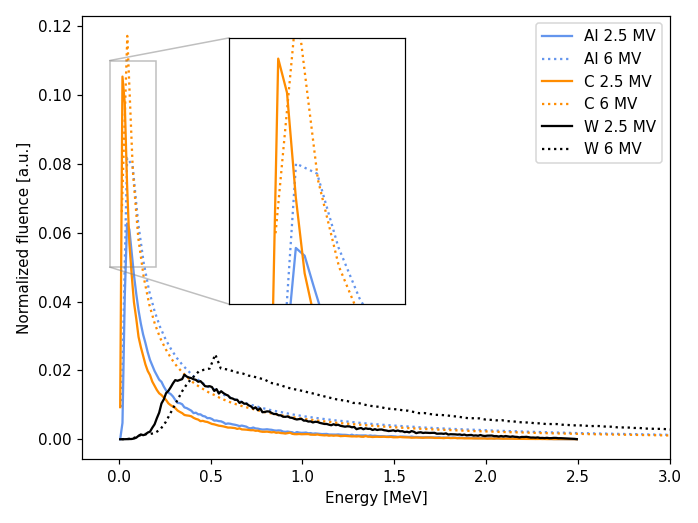

In [80]:
files = glob.glob('*.txt')

fig,ax = plt.subplots()
names = []

fmt_spec = ['-', ':', '-', ':','-', ':', '-', ':']
colors = ['cornflowerblue','cornflowerblue','darkorange','darkorange','k','k',]

ax2 = ax.inset_axes([0.25, 0.35, 0.3, 0.6])
# axin2 = ax.inset_axes(
#         [-0.1, 0.04, 0.4, 0.08], transform=ax.transData)
# axin2.set_xticks([])
# axin2.set_yticks([])

for jj,file in enumerate(sorted(files)):
    
    fluence = []
    energies = []
    
    names.append(file.split('_'))

    with open(file) as f:

        for line in f:
            energies.append(float(line.split()[0]))
            fluence.append(float(line.split()[1]))

    fluence /= np.sum(fluence)
    
    plt.plot(energies,fluence,fmt_spec[jj],color=colors[jj])
    ax2.plot(energies,fluence,fmt_spec[jj],color=colors[jj])


    fluence_str = [str(fluenc) for fluenc in fluence]
    energies = [str(energy) for energy in energies]
    with open(file.split('.txt')[0] + 'topas','w') as out:
        out.write(file + '\n \n')
        out.write('dv:So/Example/BeamEnergySpectrumValues = ' + str(len(energies)) +' ' + ' '.join(energies) + '\n')
        out.write('uv:So/Example/BeamEnergySpectrumWeights = ' + str(len(energies)) + ' ' + ' '.join(fluence_str) + '\n \n')
        
labels = []

for ii in range(len(names)):
    
    labels.append(names[ii][0] + ' 6 MV' if ii % 2 == 1 else names[ii][0] + ' 2.5 MV')
    
plt.legend(labels)
plt.xlim([-0.2,3])
plt.xlabel('Energy [MeV]')
plt.ylabel('Normalized fluence [a.u.]')


ax2.set_xlim([-0.05,0.2])
ax2.set_ylim([0.05,0.11])
ax2.set_xticks([])
ax2.set_yticks([])

ax.indicate_inset_zoom(ax2)

plt.tight_layout()




In [9]:
ii =0
['6 MV' if ii % 2 == 0 else '2.5 MV']

['6 MV']

In [10]:
files

['Al_spectrum_25.txt',
 'C_spectrum_6.txt',
 'Al_spectrum_6.txt',
 'C_spectrum_25.txt',
 'W_spectrum_6.txt',
 'W_spectrum_25.txt']

In [6]:
plt.xlim([None,3])
plt.xlabel('MeV')
plt.ylabel('Normalized Fluence (a.u.)')
plt.legend()

In [7]:
plt.savefig('spectra.png')

In [7]:
doses = np.array([
1.613708349168519e-07,
1.313530049174005e-07,
6.200432949299284e-07,
3.304057543118688e-07,
2.999242099122057e-07,
3.515523019359534e-07,

])
names = np.array([
'Dose_Al_spectrum_25'  ,
'Dose_C_spectrum_25'  ,
'Dose_W_spectrum_6',
'Dose_Al_spectrum_6'  , 
'Dose_C_spectrum_6',
'Dose_W_spectrum_25'])

<IPython.core.display.Javascript object>


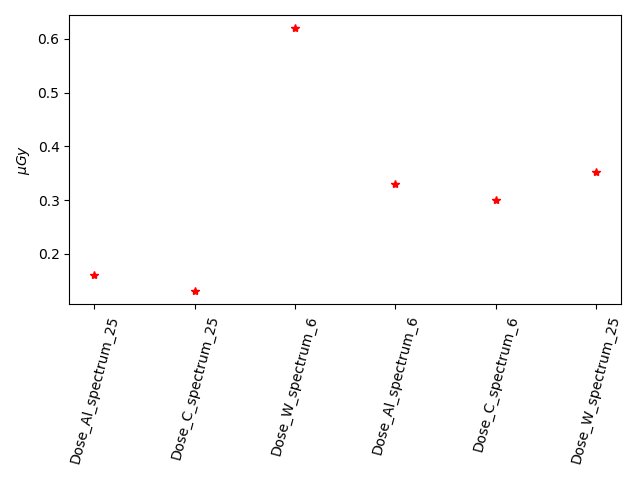

In [8]:
import pandas as pd

dat = pd.DataFrame(np.array(doses)*1e6,index=names)

plt.figure()
plt.plot(dat,'r*')
plt.xticks(rotation=75)
plt.ylabel('$\mu Gy$')
plt.tight_layout()

In [12]:
plt.savefig('doses.png')

<IPython.core.display.Javascript object>


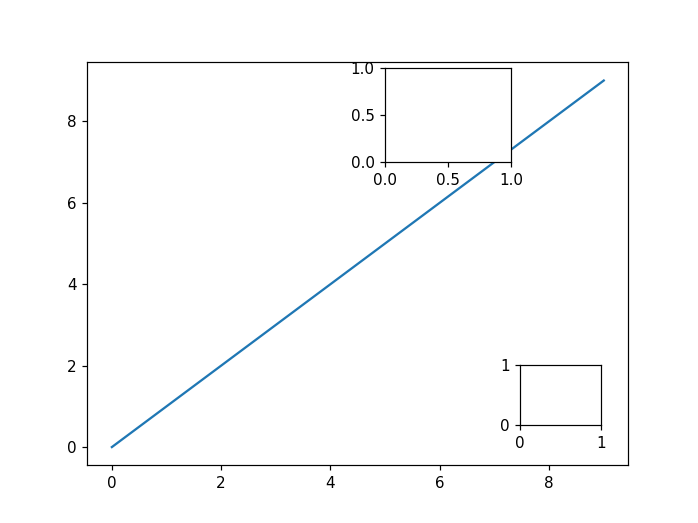

In [49]:
fig, ax = plt.subplots()
ax.plot(range(10))
axin1 = ax.inset_axes([0.8, 0.1, 0.15, 0.15])
axin2 = ax.inset_axes(
        [5, 7, 2.3, 2.3], transform=ax.transData)